<a href="https://colab.research.google.com/github/kiyong21c/Must_Have_Kaggle/blob/main/20221206_Cactus_Dataset_DataLoader_First-class_object%2C%20Global-Local_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 항공 사진 내 선인장 식별
 - 미션 : 항공사진내 선인장이 있을 확률 예측
 - 유형 : 이진분류
 - 평가지표 : ROC AUC
 - 사용모델 : 기본 CNN

In [2]:
import pandas as pd

data_path = '/content/drive/MyDrive/Colab Notebooks/kaggle/input/Aerial-Cactus-Identification/'

labels = pd.read_csv(data_path + 'train.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [3]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [4]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


### 데이터 시각화
 - 훈련데이터에 선인장이 있고(1), 없고(0) 비율 및 편차 확인

#### 타깃값 분포

In [5]:
import matplotlib.pyplot as plt
import os
print(os.getcwd()) # /content
os.chdir('/content/drive/MyDrive/Colab Notebooks') # Colab Notebooks 폴더 넣어놓은 자체제작 MatplotlibKor 라이브러리 사용하기 위함
from MatplotlibToKor import * # 
print(os.getcwd()) # /content/drive/MyDrive/Colab Notebooks

/content
/content/drive/MyDrive/Colab Notebooks


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


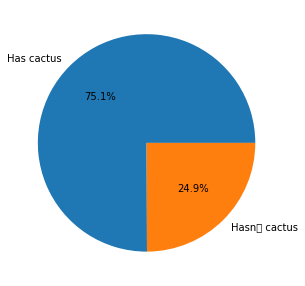

In [6]:
plt.figure(figsize=(5, 5)) # State-based
label = ['Has cactus', 'Hasn\t cactus'] # 타깃값 레이블
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%'); # Series.value_counts() : idx에 unique값, value에 각 unique의 개수

#### 이미지 출력
 - zipfile 모듈의 Zipfile 클래스 

In [ ]:
# 최초 한번만 실행하고 주석 처리(이미 압축푼 파일이 있으므로)
# from zipfile import ZipFile

# # 훈련 이미지 데이터 압축 풀기
# with ZipFile(data_path + 'train.zip') as zipper:
#     zipper.extractall()

# # 테스트 이미지 데이터 압축 풀기
# with ZipFile(data_path + 'test.zip') as zipper:
#     zipper.extractall()

In [8]:
import os

num_train = len(os.listdir('train/'))
num_test = len(os.listdir('test/'))

print(f'훈련 데이터 개수: {num_train}')
print(f'테스트 데이터 개수: {num_test}')

훈련 데이터 개수: 17500
테스트 데이터 개수: 4000


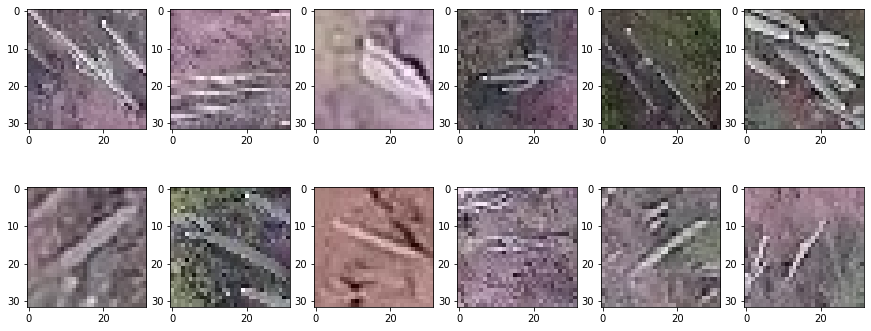

In [9]:
import matplotlib.gridspec as gridspec
import cv2 # 이미지 파일을 읽기 위해

plt.figure(figsize=(15, 6)) # State-based
grid = gridspec.GridSpec(2, 6) # 그리드스펙 객체 생성

# 선인장을 포함하는 이미지 파일명 마지막 12개
last_has_cactus_img_name = labels[labels['has_cactus'] == 1]['id'][-12:]
# last_has_cactus_img_name = labels.loc[labels['has_cactus'] == 1, 'id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = 'train/' + img_name # 이미지 파일 경로
    image = cv2.imread(img_path)   # 이미지 파일 읽기(cv2는 BGR형식)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 채널 보정(BGR → RGB)
    ax = plt.subplot(grid[idx]) # State-based로 시작해서 Object-oriented 방식으로 변경
    # ax = fig.add_subplot()    # fig = plt.figure() 했다면 이런식으로 축 추가
    ax.imshow(image) # for문 돌면서 축을 하나씩 출력(plt.imshow()가 아님 주의)

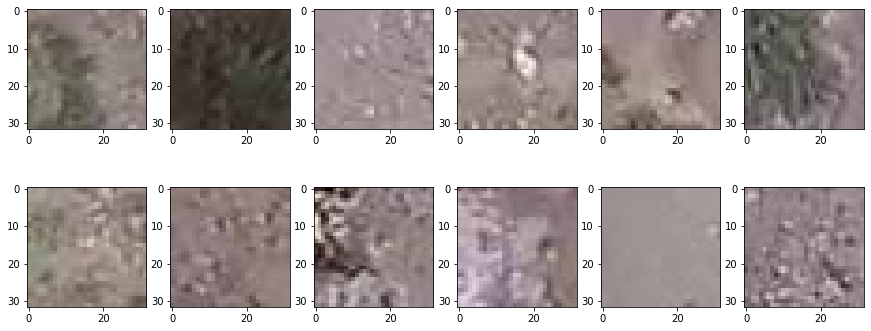

In [10]:
import matplotlib.gridspec as gridspec
import cv2 # 이미지 파일을 읽기 위해

plt.figure(figsize=(15, 6)) # State-based
grid = gridspec.GridSpec(2, 6) # 그리드스펙 객체 생성

# 선인장을 포함하지 않는 이미지 파일명 마지막 12개
last_hasnt_cactus_img_name = labels[labels['has_cactus'] == 0]['id'][-12:]
# last_hasnt_cactus_img_name = labels.loc[labels['has_cactus'] == 0, 'id'][-12:]

# 이미지 출력
for idx, img_name in enumerate(last_hasnt_cactus_img_name):
    img_path = 'train/' + img_name # 이미지 파일 경로
    image = cv2.imread(img_path)   # 이미지 파일 읽기(cv2는 BGR형식)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 채널 보정(BGR → RGB)
    ax = plt.subplot(grid[idx]) # State-based로 시작해서 Object-oriented 방식으로 변경
    # ax = fig.add_subplot()    # fig = plt.figure() 했다면 이런식으로 축 추가
    ax.imshow(image) # for문 돌면서 축을 하나씩 출력(plt.imshow()가 아님 주의)

In [11]:
image.shape

(32, 32, 3)

 - 32x32 의 낮은 해상도의 컬러(3채널) 이미지

### 시드값 고정 및 GPU 장비 설정
 - 다시 실행해도 같은 결과를 얻기 위함
 - 머신러닝 훈련시 random_state와 같은 역할

In [12]:
# 아래 임포트한 패키지 및 seed 함수를 라이브러리로 저장(SeedFix폴더의 seedfix파일의 seed함수)
import torch
import random
import numpy as np
import os

# 시드값 고정
def seed(seed=50):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)               # 파이썬 난수 생성기 시드 고정
    np.random.seed(seed)            # 넘파이 난수 생성기 시드 고정
    torch.manual_seed(seed)         # 파이토치 난수 생성기 시드 고정(CPU 사용 시)
    torch.cuda.manual_seed(seed)    # 파이토치 난수 생성기 시드 고정(GPU 사용 시)
    torch.cuda.manual_seed_all(seed)# 파이토치 난수 생성기 시드 고정(멀티GPU 사용 시)
    torch.backends.cudnn.deterministic = True # 확정적 연산 사용
    torch.backends.cudnn.benchmark = False    # 벤치마크 기능 해제
    torch.backends.cudnn.enabled = False      # cudnn 사용 해제

In [29]:
from SeedFix.seedfix import seed
seed()

#### GPU 장비 설정

In [14]:
# 조건문 
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [15]:
# 한줄 조건문
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 코랩 환경 설정이 되어있는상태여야함

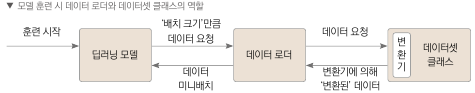

#### 훈련 데이터, 검증 데이터 분리


In [16]:
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터 분리
train, valid = train_test_split(labels,
                                test_size=0.1,                  # 훈련데이터90%, 검증데이터10%
                                stratify=labels['has_cactus'],  # 동일한 타깃값 비율을 갖도록 split 
                                random_state=50)

In [17]:
print('훈련 데이터 개수 :', len(train))
print('검증 데이터 개수 :', len(valid))

훈련 데이터 개수 : 15750
검증 데이터 개수 : 1750


#### 데이터셋 클래스 정의
 - 파이토치로 신경망 모델을 구축하기 위함

In [18]:
import cv2
from torch.utils.data import Dataset # 추상클래스(를 상속받아 특수메서드 오버라이딩)

class ImageDataset(Dataset):
    # 초기화 메서드(생성자)
    def __init__(self, df, img_dir='./', transform=None):
        super().__init__()  # 부모(추상)클래스인 Dataset의 생성자 호출

        # 전달받은 인수들 저장
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
    
    # 데이터셋 크기 반환 메서드
    def __len__(self):
        return len(self.df)
    
    # 인덱스(idx)에 해당하는 데이터 및 레이블 반환 메서드
    def __getitem__(self):
        img_id = self.df.iloc[idx, 0]    # 이미지 ID
        img_path = self.img_dir + img_id # 이미지 파일경로
        image = cv2.imread(img_path)     # 이미지 파일읽기
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 이미지 색상보정
        label = self.df.iloc[idx, 1]     # 이미지 레이블(타깃값)

        if self.transform is not None:
            image = self.transform(image) # 이미지 변환기가 있다면 적용
        return image, label

#### 데이터셋 생성
 - 파이토치 모델로 이미지를 다루려면 이미지 데이터를 텐서 타입으로 변환필요

In [23]:
from torchvision import transforms # 이미지 변환 모듈
transform = transforms.ToTensor()
# cv2.imread()로 읽어온 이미지(가로X세로X채널) → 파이토치에서 사용하기 위한 이미지(채널X가로X세로)

In [24]:
dataset_train = ImageDataset(df=train, img_dir='train/', transform=transform)
dataset_valid = ImageDataset(df=valid, img_dir='train/', transform=transform)

#### 파이썬의 특징인 일급객체 이해하기
 - 1. 함수를 변수에 담아서 변수()로 사용할 수 있다.
 - 2. 함수1을 함수2의 파라미터에 넣을 수 있다(괄호 없이 사용)
 - 3. 함수1을 함수2의 리턴값으로 사용할수 있다(괄호 포함 사용)


#### 괄호 없이 함수를 사용하는 경우 이해하기
  - 1. 함수 뒤에 붙는 괄호는 그 함수를 호출하겠다는 뜻
  - 2. 함수는 정의를 한다고 해서 바로 실행되는 것이 아니다. 정의 후에 꼭 불러주는 작업이 있어야 실행됨
  - 3. 함수도 하나의 객체이며, 만약 괄호 없이 사용했다면 그저 함수 객체 그 자체로 넘겼다는 뜻

[링크 텍스트](https://blog.naver.com/qkdqkd1122/222880930740)

  - 4. 사용 예제

    ```
def str_length(s):
        return len(s)
max('a', 'abc', 'ab', key=str_length)
# str_length('a') → 1
# str_length('abc') → 3
# str_length('ab') → 2
# max(1, 3, 2) → 3 즉, 'abc'가 return됨
    ```
    ```
# str_length함수가 즉시 실행되는 것이 아니라,
# max함수 내부에서 순서대로 호출되면서,
# 중간결과 값을 저장하며, max함수의 인자로 사용됨
    ```

 [링크 텍스트](https://hashcode.co.kr/questions/7489/python%EC%97%90%EC%84%9C-%EC%96%B8%EC%A0%9C-%EA%B4%84%ED%98%B8%EB%A5%BC-%EC%8D%A8%EC%95%BC-%ED%95%98%EB%82%98%EC%9A%94)

#### 데이터 로더 생성
 - 데이터셋 생성 → 데이터 로더 생성
 - 지정한 배치크기만큼 데이터를 불러오는 객체

In [25]:
from torch.utils.data import DataLoader

loader_train = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True) # 한번호출시 32개의 이미지를 불러옴
loader_valid = DataLoader(dataset=dataset_valid, batch_size=32, shuffle=False)

In [49]:
from SeedFix.seedfix import *
# seed(), seed_work(), g 변수 모두 호출됨

### 모델 생성
 - 기본적인 합성곱 신경망(CNN) 모델

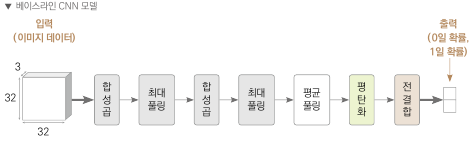

In [50]:
import torch.nn as nn # 신경망 모듈
import torch.nn.functional as F # 신경망 모듈에서 자주사용되는 함수를 모아둔 모듈

#### 전역변수와 지역변수
 - 1. 지역변수는 전역변수로 나오지 못한다

    ```
    a = 10
    def test(b, c):
        a = b + c
        return a

    print(a) # 10 : 함수내에서 정의된 지역변수 a는 전역으로 나오지 못한다.
    ```


 - 2. 전역변수를 지역변수로 가져와서 수정가능하며, 전역변수에 영향을 준다

    ```
    a = 10
    def test(b, c):
        global a    # 전역변수를 지역변수로 가져옴
        a = b + c
        return a
        
    print(test(1, 2)) # 3 : 전역변수 a를 지역변수로 가져와서 수정하면 전역에 영향을 준다.
    ```